# DSE220:  Machine Learning - Homework 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Obtain Data

In [2]:
# read csv files
wine_modified = pd.read_csv('wine_modified.csv')
wine_train_data = pd.read_csv('wine_train_data.csv')
wine_train_labels = pd.read_csv('wine_train_labels.csv')
wine_val_data = pd.read_csv('wine_val_data.csv')
wine_val_labels = pd.read_csv('wine_val_labels.csv')
wine_test_data = pd.read_csv('wine_test_data.csv')
wine_test_labels = pd.read_csv('wine_test_labels.csv')

# check data
wine_modified.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,NaN,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,NaN,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,NaN,2.50,NaN,NaN,3.85,NaN,NaN,NaN,7.80,NaN,NaN,NaN
4,1.0,13.24,2.59,NaN,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Data Preprocessing

**Question 1:** Remove the rows with missing labels (’class’) and rows with more than 7 missing features. Report the remaining number of rows. (1 mark)

In [3]:
# print number of rows in original data
print(str(wine_modified.shape[0]) + ' rows in original data')

# remove rows with missing labels
wine_mod = wine_modified.dropna(axis=0, how='any',subset=['class'])
print(str(wine_mod.shape[0]) + ' rows in data after dropping rows with missing labels')

# count number of rows with more than 7 missing features
missing = wine_mod.shape[1] - wine_mod.count(axis=1).values
print(str(sum(missing > 7)) + ' rows have more than 7 missing features')

# remove rows with more than 7 missing features
wine_mod = wine_mod.dropna(axis=0, how='any',thresh=8)
print(str(wine_mod.shape[0]) + ' rows in data after dropping rows with more than 7 missing features')

178 rows in original data
168 rows in data after dropping rows with missing labels
14 rows have more than 7 missing features
154 rows in data after dropping rows with more than 7 missing features


**Question 2:** Remove features with > 50% of missing values. For other features with missing values fill them with the mean of the corresponding features. Report the removed features (if any) and standard deviation of features with missing values after filling. (2 marks)

In [4]:
# get list of original features
original_features = wine_modified.columns.values[1:]

# remove features with >50% missing values
wine_mod = wine_mod.dropna(axis=1, thresh=0.5*wine_mod.shape[0])

# get list of remaining features
remaining_features = wine_mod.columns.values[1:]

# determine which features were dropped
dropped_features = [f for f in original_features if f not in remaining_features]
print('dropped_features: ' + str(dropped_features))

dropped_features: ['Ash']


In [5]:
# fill remaining null values with column mean
wine_mod = wine_mod.fillna(wine_mod.mean())

# get standard deviation of features
wine_mod_std = wine_mod.iloc[:,1:].std()

print('standard deviation of features:\n')
print(wine_mod_std)

standard deviation of features:

Alcohol                   3.804067
Malic acid                1.116005
Alcalinity of ash         3.456794
Magnesium                14.440377
Total phenols             0.617237
Flavanoids                0.873573
Nonflavanoid phenols      0.127083
Proanthocyanins           0.587671
Color intensity           2.325204
Hue                       0.229412
OD280/OD315               0.723261
Proline                 303.033368
dtype: float64


**Question 3:** Detect and remove rows with any outliers/incorrect values in features ’alcohol’ and ’proline’ (if any). Clearly state the basis of your removal. (1 mark)

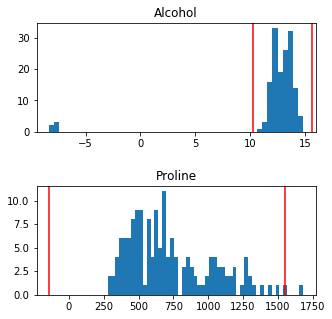

In [6]:
# get data
alcohol = wine_mod.loc[:,'Alcohol'].values
proline = wine_mod.loc[:,'Proline'].values

# calculate interquartile range and outlier thresholds per tukey's test
alc_q75, alc_q25 = np.percentile(alcohol, [75 ,25])
alc_iqr = alc_q75 - alc_q25
alc_lower = alc_q25 - 1.5*alc_iqr
alc_upper = alc_q75 + 1.5*alc_iqr

pro_q75, pro_q25 = np.percentile(proline, [75 ,25])
pro_iqr = pro_q75 - pro_q25
pro_lower = pro_q25 - 1.5*pro_iqr
pro_upper = pro_q75 + 1.5*pro_iqr

# plot data
fig, ax = plt.subplots(2, 1, figsize=(5,5))

ax[0].hist(alcohol, 50)
ax[0].axvline(x=alc_lower,color='red')
ax[0].axvline(x=alc_upper,color='red')
ax[0].set_title('Alcohol')

ax[1].hist(proline, 50)
ax[1].axvline(x=pro_lower,color='red')
ax[1].axvline(x=pro_upper,color='red')
ax[1].set_title('Proline')

fig.subplots_adjust(hspace=0.5)
plt.show()

From the histograms above, we can see that there are some rows for which the alcohol value is negative, so we can remove those.  There are also some rows for which the proline value is larger than the 75th percentile plus 1.5 times the interquartile range, which is a typical evaluation metric for identifying outliers.  It is less clear that the proline outlier values should be removed, as the distribution is right skewed and there are other data points at the right tail of the distribution, but for the purposes of this analysis, we will remove these points.

In [7]:
# remove rows with negative alcohol values
wine_mod = wine_mod.loc[wine_mod.loc[:,'Alcohol'] > 0,:]

# remove rows with proline value greater than the upper outlier threshold
wine_mod = wine_mod.loc[wine_mod.loc[:,'Proline'] <= pro_upper,:]

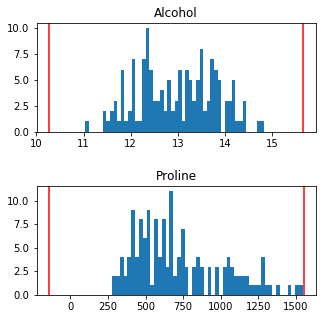

In [8]:
# plot data after removal of outliers
alcohol = wine_mod.loc[:,'Alcohol'].values
proline = wine_mod.loc[:,'Proline'].values

# plot data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(5,5))

ax[0].hist(alcohol, 50)
ax[0].axvline(x=alc_lower,color='red')
ax[0].axvline(x=alc_upper,color='red')
ax[0].set_title('Alcohol')

ax[1].hist(proline, 50)
ax[1].axvline(x=pro_lower,color='red')
ax[1].axvline(x=pro_upper,color='red')
ax[1].set_title('Proline')

fig.subplots_adjust(hspace=0.5)
plt.show()

## Decision Trees

**Question 4:** Train Decision Tree model on train data for criterions = {’gini’, ’entropy’} and report the accuracies on the validation data. Select the best criterion and report the accuracy on the test data. (1 mark)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# define model
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=1)

# fit model
clf_gini.fit(wine_train_data, wine_train_labels)

# predict validation data
pred_gini = clf_gini.predict(wine_val_data)

# evaluate accuracy on validation data
print ('Validation accuracy using gini = ' + str(clf_gini.score(wine_val_data, wine_val_labels)))

#correct_labels = wine_val_labels.loc[:,'class'].values
#print ('Validation accuracy using gini criteria = ' + str(np.sum(pred_gini == correct_labels)*1.0/len(correct_labels)))

Validation accuracy using gini = 0.948717948718


In [11]:
# define model
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)

# fit model
clf_entropy.fit(wine_train_data, wine_train_labels)

# predict validation data
pred_entropy = clf_entropy.predict(wine_val_data)

# evaluate accuracy on validation data
print ('Validation accuracy using entropy = ' + str(clf_entropy.score(wine_val_data, wine_val_labels)))

#print ('Validation accuracy using entropy criteria = ' + str(np.sum(pred_entropy == correct_labels)*1.0/len(correct_labels)))

Validation accuracy using entropy = 0.948717948718


The accuracy of a decision tree is the same for both 'gini' and 'entropy' evaluation criteria, at about 94.9% accuracy on the validation data.  Below, we evaluate both models on the test data, and obtain an accuracy of about 82%.

In [12]:
# evaluate accuracy on test data
print ('Test accuracy using gini = ' + str(clf_gini.score(wine_test_data, wine_test_labels)))
print ('Test accuracy using entropy = ' + str(clf_entropy.score(wine_test_data, wine_test_labels)))

Test accuracy using gini = 0.820512820513
Test accuracy using entropy = 0.820512820513


**Question 5:** Use the criterion selected above to train Decision Tree model on train data for min samples split={2,5,10,20} and report the accuracies on the validation data. Select the best parameter and report the accuracy on the test data. (2 marks)

In [13]:
best_leaf_size = None
best_score = None

for leaf_size in [2,5,10,20]:
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=leaf_size, random_state=1)
    clf.fit(wine_train_data, wine_train_labels)
    score = clf.score(wine_val_data, wine_val_labels)
    print ('Validation accuracy for min_samples_leaf ' + str(leaf_size) + ' = ' + str(score))
    
    if best_score == None:
        best_leaf_size = leaf_size
        best_score = score
    elif score > best_score:
        best_leaf_size = leaf_size
        best_score = score
        
print('\nBest validation accuracy is ' + str(best_score) + ' for min_samples_leaf = ' + str(best_leaf_size))

Validation accuracy for min_samples_leaf 2 = 0.948717948718
Validation accuracy for min_samples_leaf 5 = 0.948717948718
Validation accuracy for min_samples_leaf 10 = 0.897435897436
Validation accuracy for min_samples_leaf 20 = 0.897435897436

Best validation accuracy is 0.948717948718 for min_samples_leaf = 2


In [14]:
# create best model
best_clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=best_leaf_size, random_state=1)

# fit model on combined training and validation data
wine_comb_data = np.concatenate((wine_train_data, wine_val_data))
wine_comb_labels = np.concatenate((wine_train_labels, wine_val_labels))
#wine_comb_labels = wine_comb_labels.T[0]
best_clf.fit(wine_comb_data, wine_comb_labels)

# evaluate accuracy on test data
score = best_clf.score(wine_test_data, wine_test_labels)
print ('Test accuracy for min_samples_leaf ' + str(best_leaf_size) + ' = ' + str(score))

Test accuracy for min_samples_leaf 2 = 0.820512820513


**Question 6:** Use the parameters selected above (Q4 and Q5) to train Decision Tree model using the first 20, 40, 60, 80 and 100 samples from train data. Keep the validation set unchanged during this analysis. Report and plot the accuracies on the validation data. (2 marks)

Validation accuracy for subset size 20 = 0.692307692308
Validation accuracy for subset size 40 = 0.871794871795
Validation accuracy for subset size 60 = 0.871794871795
Validation accuracy for subset size 80 = 0.948717948718
Validation accuracy for subset size 100 = 0.948717948718


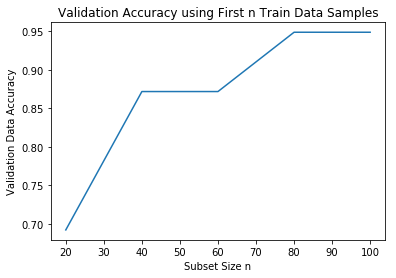

In [15]:
# subset sizes
subset_size = [20,40,60,80,100]

# empty list to track validation accuracy scores
val_scores = []

# train model on subsets of training data
for s in subset_size:
    best_clf.fit(wine_comb_data[:s], wine_comb_labels[:s])
    score = best_clf.score(wine_val_data, wine_val_labels)
    val_scores.append(score)
    print ('Validation accuracy for subset size ' + str(s) + ' = ' + str(score))

# plot validation scores
plt.plot(subset_size, val_scores)
plt.xlabel('Subset Size n')
plt.ylabel('Validation Data Accuracy')
plt.title('Validation Accuracy using First n Train Data Samples')
plt.show()

## Nearest Neighbor

**Normalize Data:** Normalize features such that for each feature the mean is 0 and the standard deviation is 1 in the train+validation data. Use the normalizing factors calculated on train+validation data to modify the values in train, validation and test data.

In [16]:
# calculate mean and std for each column
comb_means = wine_comb_data.mean(axis=0)
comb_std = wine_comb_data.std(axis=0)

# normalize train, validation, and test data
wine_train_data_centered = wine_train_data.subtract(comb_means)
wine_train_data_norm = wine_train_data_centered.divide(comb_std)

wine_val_data_centered = wine_val_data.subtract(comb_means)
wine_val_data_norm = wine_val_data_centered.divide(comb_std)

wine_test_data_centered = wine_test_data.subtract(comb_means)
wine_test_data_norm = wine_test_data_centered.divide(comb_std)

In [17]:
# test calculation on combined train + validation data
wine_comb_data_centered = wine_comb_data - comb_means
print('mean of centered columns (should be near 0):\n', wine_comb_data_centered.mean(axis=0))

wine_comb_data_norm = wine_comb_data_centered / comb_std
print('\nstandard deviation of normalized columns (should be 1):\n', wine_comb_data_norm.std(axis=0))

mean of centered columns (should be near 0):
 [ -5.75079552e-16  -4.47284096e-16   1.82108525e-16   2.55590912e-17
  -4.90734551e-15  -1.58146877e-16  -3.03514208e-17  -1.35782672e-17
  -1.02236365e-16   3.06709095e-16   5.59105120e-18   3.38657959e-16
   9.81469103e-15]

standard deviation of normalized columns (should be 1):
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


**Question 7:** Train k-nn model on train + validation data and report accuracy on test data. Use Euclidean distance and k=3. (1 mark)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

In [19]:
# define model
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# fit model on combined train + validation data
knn.fit(wine_comb_data_norm, wine_comb_labels.ravel())

# evaluate on test data
score = knn.score(wine_test_data_norm, wine_test_labels)
print ('Test accuracy = ' + str(score))

Test accuracy = 0.871794871795


**Question 8:** Train the model on train data for distance metrics defined by l1, linf, l2. Report the accuracies on the validation data. Select the best metric and report the accuracy on the test data for the selected metric. Use k=3. (1 mark)

In [20]:
dist_metrics = ['manhattan','chebyshev','euclidean']

best_metric = None
best_score = None

for m in dist_metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=m)
    knn.fit(wine_train_data_norm, wine_train_labels.values.ravel())
    score = knn.score(wine_val_data_norm, wine_val_labels.values.ravel())
    
    print('Validation accuracy is ' + str(score) + ' for ' + m + ' distance metric')
    
    if best_score == None:
        best_score = score
        best_metric = m
    if score > best_score:
        best_score = score
        best_metric = m

print('\nBest validation accuracy is ' + str(best_score) + ' for ' + best_metric + ' distance metric')

Validation accuracy is 0.948717948718 for manhattan distance metric
Validation accuracy is 0.923076923077 for chebyshev distance metric
Validation accuracy is 0.923076923077 for euclidean distance metric

Best validation accuracy is 0.948717948718 for manhattan distance metric


In [21]:
# evaluate best metric on test data
knn_best = KNeighborsClassifier(n_neighbors=3, metric=best_metric)
knn_best.fit(wine_comb_data_norm, wine_comb_labels.ravel())
score = knn_best.score(wine_test_data_norm, wine_test_labels.values.ravel())

print('Test accuracy is ' + str(score) + ' for ' + best_metric + ' distance metric')

Test accuracy is 0.974358974359 for manhattan distance metric


**Question 9:** Train the k-nn model on train data for k=1,3,5,7,9. Report and plot the accuracies on the validation data. Select the best ’k’ value and report the accuracy on the test data for the selected ’k’. Use Euclidean distance. (2 marks)

Validation accuracy for k = 1 is 0.948717948718
Validation accuracy for k = 3 is 0.923076923077
Validation accuracy for k = 5 is 0.948717948718
Validation accuracy for k = 7 is 0.974358974359
Validation accuracy for k = 9 is 0.948717948718


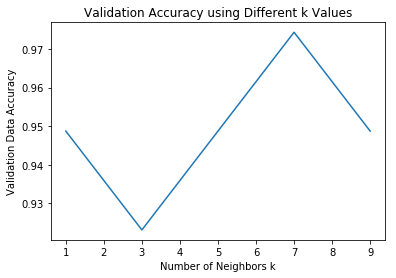

Best validation accuracy is 0.974358974359 for k = 7


In [22]:
# k values to evaluate
k_list = [1,3,5,7,9]

# empty list to track validation accuracy scores
val_scores = []
best_k = None
best_score = None

# train model using different k values
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(wine_train_data_norm, wine_train_labels.values.ravel())
    score = knn.score(wine_val_data_norm, wine_val_labels.values.ravel())
    val_scores.append(score)
    print ('Validation accuracy for k = ' + str(k) + ' is ' + str(score))
    
    if best_k == None:
        best_k = k
        best_score = score
    elif score > best_score:
        best_k = k
        best_score = score

# plot validation scores
plt.plot(k_list, val_scores)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Validation Data Accuracy')
plt.title('Validation Accuracy using Different k Values')
plt.show()

print('Best validation accuracy is ' + str(best_score) + ' for k = ' + str(best_k))

In [23]:
# evaluate best k model on test data
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(wine_comb_data_norm, wine_comb_labels.ravel())
score = knn.score(wine_test_data_norm, wine_test_labels.values.ravel())

print('Test accuracy is ' + str(score) + ' for k = ' + str(best_k))

Test accuracy is 0.923076923077 for k = 7


**Question 10:** Instead of using full train data, train the model using the first 20, 40, 60, 80 and 100 data samples from train data. Keep the validation set unchanged during this analysis. Report and plot the accuracies on the validation data. Use Euclidean distance and k=3. Note: Don’t shuffle the data and use only the ’first n samples’, otherwise your answers may differ. (2 marks)

Validation accuracy for subset size 20 = 0.948717948718
Validation accuracy for subset size 40 = 1.0
Validation accuracy for subset size 60 = 1.0
Validation accuracy for subset size 80 = 1.0
Validation accuracy for subset size 100 = 0.923076923077


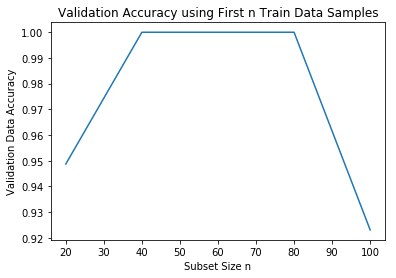

In [24]:
# subset sizes
subset_size = [20,40,60,80,100]

# empty list to track validation accuracy scores
val_scores = []

# train model on subsets of training data
for s in subset_size:
    knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    knn.fit(wine_train_data_norm[:s], wine_train_labels[:s].values.ravel())
    score = knn.score(wine_val_data_norm, wine_val_labels.values.ravel())
    val_scores.append(score)
    print ('Validation accuracy for subset size ' + str(s) + ' = ' + str(score))

# plot validation scores
plt.plot(subset_size, val_scores)
plt.xlabel('Subset Size n')
plt.ylabel('Validation Data Accuracy')
plt.title('Validation Accuracy using First n Train Data Samples')
plt.show()